<a href="https://colab.research.google.com/github/arnabdas2019ovgu/Deep_Leaning/blob/master/CNN/Keras/HandWrittenDigitRecog/HandWrittenDigitClassification_Lenet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import idx2numpy
import numpy as np
import keras
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')

import scipy.misc
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

In [0]:
# Loading data from idx files to numpy arrays.
X_train = idx2numpy.convert_from_file('datasets/train-images.idx3-ubyte')
Y_train = idx2numpy.convert_from_file('datasets/train-labels.idx1-ubyte')
X_test =  idx2numpy.convert_from_file('datasets/t10k-images.idx3-ubyte')
Y_test = idx2numpy.convert_from_file('datasets/t10k-labels.idx1-ubyte')

# Normalize image vectors
X_train = X_train/255.
X_test = X_test/255.

# Reshape
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],X_train.shape[2],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))
Y_train = Y_train.T
Y_test = Y_test.T
Y_train = Y_train.reshape((Y_train.shape[0],1))
Y_test = Y_test.reshape((Y_test.shape[0],1))

In [92]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 60000
number of test examples = 10000
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 1)
X_test shape: (10000, 28, 28, 1)
Y_test shape: (10000, 1)


In [0]:
def DigitRecogModel(input_shape):
   X_input = Input(input_shape)
   X = ZeroPadding2D((2, 2))(X_input)

   X = Conv2D(6, (5, 5), strides = (1, 1), name = 'conv0')(X)
   X = BatchNormalization(axis = 3, name = 'bn0')(X)
   X = Activation('relu')(X)
   X = MaxPooling2D(pool_size=2, padding='valid')(X)

   X = Conv2D(16, (5, 5), strides = (1, 1), name = 'conv1')(X)
   X = MaxPooling2D(pool_size=2, padding='valid')(X)

   X = Flatten()(X)
   X = Dense(120, activation='relu', name='fc1')(X)
   X = Dense(84, activation='relu', name='fc2')(X)
   X = Dense(84, activation='relu', name='fc3')(X)
   X = Dense(1, activation='relu', name='fc4')(X)

   model = Model(inputs = X_input, outputs = X, name='DigitRecogModel_Lenet5')

   return model


In [0]:
MyModel = DigitRecogModel(X_train.shape[1:])

In [0]:
MyModel.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["accuracy"])

In [106]:
MyModel.fit(x = X_train, y = Y_train, epochs = 60, batch_size = 1000)

Epoch 1/60
60000/60000 [==============================] - 2s 26us/step - loss: 4.7863 - acc: 0.2316
Epoch 2/60
60000/60000 [==============================] - 1s 12us/step - loss: 1.5252 - acc: 0.4451
Epoch 3/60
60000/60000 [==============================] - 1s 12us/step - loss: 0.9349 - acc: 0.5695
Epoch 4/60
60000/60000 [==============================] - 1s 12us/step - loss: 0.6981 - acc: 0.6474
Epoch 5/60
60000/60000 [==============================] - 1s 12us/step - loss: 0.5653 - acc: 0.7008
Epoch 6/60
60000/60000 [==============================] - 1s 12us/step - loss: 0.4750 - acc: 0.7440
Epoch 7/60
60000/60000 [==============================] - 1s 12us/step - loss: 0.4214 - acc: 0.7608
Epoch 8/60
60000/60000 [==============================] - 1s 12us/step - loss: 0.3717 - acc: 0.7888
Epoch 9/60
60000/60000 [==============================] - 1s 12us/step - loss: 0.3316 - acc: 0.8091
Epoch 10/60
60000/60000 [==============================] - 1s 12us/step - loss: 0.2845 - acc: 0.8399

In [107]:
preds = MyModel.evaluate(x = X_test, y = Y_test)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

10000/10000 [==============================] - 1s 80us/step

Loss = 0.18697115585058927
Test Accuracy = 0.9644


In [108]:
MyModel.summary()

Model: "DigitRecogModel_Lenet5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
zero_padding2d_13 (ZeroPaddi (None, 32, 32, 1)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 28, 28, 6)         156       
_________________________________________________________________
bn0 (BatchNormalization)     (None, 28, 28, 6)         24        
_________________________________________________________________
activation_14 (Activation)   (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 10, 10, 

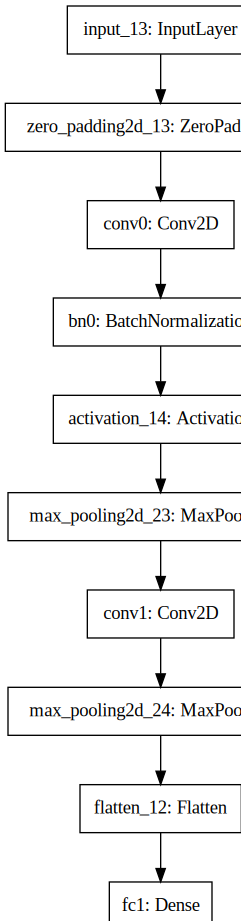

In [109]:
plot_model(MyModel, to_file='MyModel.png')
SVG(model_to_dot(MyModel).create(prog='dot', format='svg'))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Input image shape: (1, 28, 28, 1)
[[2.4515934]]


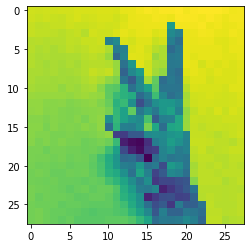

In [110]:
img_path = 'images/my_image.jpg'
img = image.load_img(img_path, grayscale=True,target_size=(28, 28))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x/255.0
print('Input image shape:', x.shape)
imgplot = imshow(img)
print(MyModel.predict(x))